
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [10]:
tf.__version__

'2.1.0'

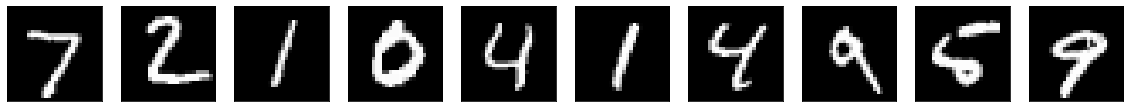

In [11]:
# Plot a few data points
%matplotlib inline

n = 10  # how many records we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [13]:
# Normalize to run the training easily!
x_train = x_train/255
x_test = x_test/255

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [16]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [17]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [18]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [20]:
autoencoder.fit(x_train, x_train, epochs=5,validation_data=[x_test, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 302us/sample - loss: 0.2517 - accuracy: 0.7916 - val_loss: 0.2181 - val_accuracy: 0.7898
Epoch 2/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.1912 - accuracy: 0.7972 - val_loss: 0.1662 - val_accuracy: 0.8019
Epoch 3/5
60000/60000 [==============================] - 17s 278us/sample - loss: 0.1586 - accuracy: 0.8022 - val_loss: 0.1503 - val_accuracy: 0.8043
Epoch 4/5
60000/60000 [==============================] - 17s 275us/sample - loss: 0.1467 - accuracy: 0.8046 - val_loss: 0.1387 - val_accuracy: 0.8059
Epoch 5/5
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1380 - accuracy: 0.8063 - val_loss: 0.1324 - val_accuracy: 0.8069


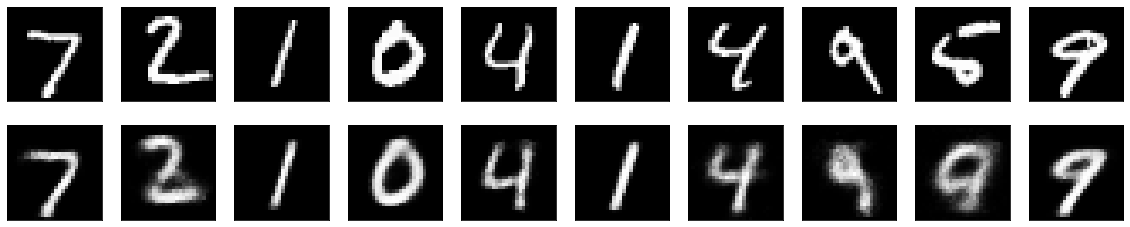

In [21]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gsussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [22]:
from tensorflow.keras.layers import GaussianNoise

In [23]:
sample = GaussianNoise(0.2)

In [24]:
noisey = sample(x_test[0:2],training=True)

W0328 08:03:03.110723 4511417792 base_layer.py:1790] Layer gaussian_noise is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



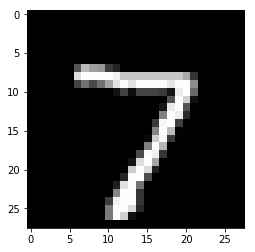

In [26]:
plt.imshow(x_test[0])

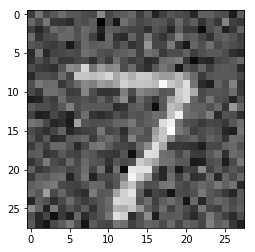

In [27]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

Again similar to above it is a symmetric dense network. Gaussian noise is added at the input so that the network sees noisy images and is able to map it to the clean outputs. 

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [30]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [31]:
noise_remover = Sequential([encoder, decoder])

In [32]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [34]:
noise_remover.fit(x_train, x_train, epochs=8,
                           validation_data=[x_test, x_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 20s 340us/sample - loss: 0.1683 - accuracy: 0.8013 - val_loss: 0.1325 - val_accuracy: 0.8067
Epoch 2/8
60000/60000 [==============================] - 19s 321us/sample - loss: 0.1294 - accuracy: 0.8080 - val_loss: 0.1201 - val_accuracy: 0.8084
Epoch 3/8
60000/60000 [==============================] - 19s 315us/sample - loss: 0.1197 - accuracy: 0.8097 - val_loss: 0.1128 - val_accuracy: 0.8104
Epoch 4/8
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1142 - accuracy: 0.8106 - val_loss: 0.1092 - val_accuracy: 0.8102
Epoch 5/8
60000/60000 [==============================] - 18s 299us/sample - loss: 0.1111 - accuracy: 0.8111 - val_loss: 0.1060 - val_accuracy: 0.8111
Epoch 6/8
60000/60000 [==============================] - 20s 327us/sample - loss: 0.1091 - accuracy: 0.8114 - val_loss: 0.1040 - val_accuracy: 0.8109
Epoch 7/8
60000/60000 [===========================

In [35]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


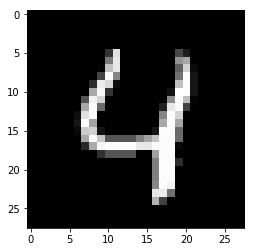

The Noisey Version


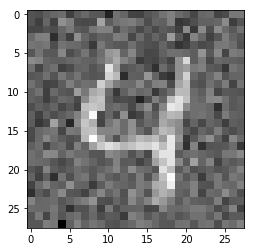

After going through denoiser


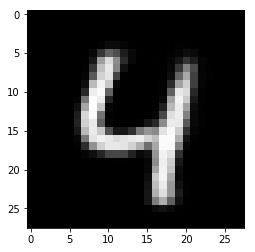

In [36]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

## Challenge to followup!

Above is a simple dense network. Build a CNN based autoencoder to perform similar tasks! 

Hint: You may want to use UpSample layers in the decoder. 
